In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2

In [5]:
l = os.listdir("./im")

In [6]:
image = Image.open(f'./im/{l[0]}')
image = image.convert('L')
image = np.array(image)

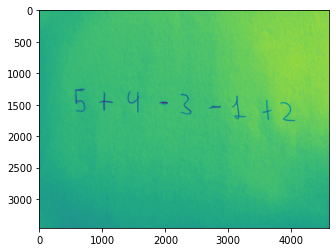

In [18]:
plt.imshow(image)

In [17]:
image = np.rot90(image)

In [19]:
thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)[1]
n = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)[1]

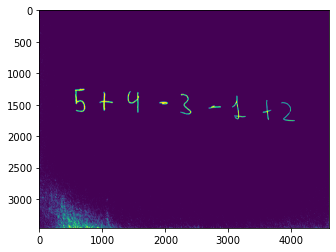

In [35]:
plt.imshow(thresh)

In [38]:
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
pi = []
pos = []
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    if w + h > 120:
        print(x, y, w, h)
        pos.append([x, y, w, h])
        pi.append(n[y:y+h, x:x+w])

409 3267 485 189
3881 1622 185 139
2695 1516 196 45
3847 1463 156 157
1913 1453 135 43
3556 1429 134 313
3070 1360 216 372
2246 1330 175 325
961 1298 215 299
1408 1289 181 336
570 1248 166 368


In [39]:
p = pi.copy()
for i in range(len(p)):
    if p[i].shape[0] > p[i].shape[1]:
        zero = np.full((p[i].shape[0], int((p[i].shape[0] - p[i].shape[1])/2)), 255)
        p[i] = np.concatenate((zero, p[i]), axis=1)
        p[i] = np.concatenate((p[i], zero), axis=1)
    else:
        zero = np.full((int((p[i].shape[1] - p[i].shape[0])/2), p[i].shape[1]), 255)
        p[i] = np.concatenate((zero, p[i]), axis=0)
        p[i] = np.concatenate((p[i], zero), axis=0)

In [40]:
res = []
for ps in p:
    res.append(cv2.resize(ps, dsize=(45, 45), interpolation= cv2.INTER_NEAREST))
res2 = res.copy()

In [41]:
from keras.models import load_model

In [42]:
m = load_model("second_model.h5")

In [43]:
for i in range(len(res)):
    res[i] = res[i]/255
res = np.array(res)
res = res.reshape(len(res), 45, 45, 1)

In [44]:
m.predict_classes(res)

array([10,  6,  7,  2,  7, 10,  1,  3,  7,  9,  5])

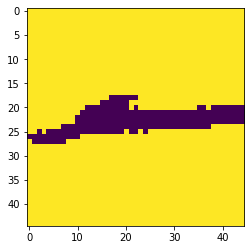

In [60]:
plt.imshow(res2[2])